# Impoting Libraries

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Loading Dataset

In [97]:
df=pd.read_csv(r'hotel_bookings 2.csv')

# EDA(Exploratory Data Analysis) and Data Cleaning

In [155]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,month
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01,7
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01,7
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02,7
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02,7
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03,7


In [ ]:
df.tail()

In [11]:
df.shape

(119390, 32)

In [12]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [103]:
#Change "reservation_status_date" datatype object to Date formate for analysis 
df['reservation_status_date']=pd.to_datetime(df['reservation_status_date'], dayfirst=True) 

In [15]:
df.describe(include= 'object')

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status
count,119390,119390,119390,118902,119390,119390,119390,119390,119390,119390,119390
unique,2,12,5,177,8,5,10,12,3,4,3
top,City Hotel,August,BB,PRT,Online TA,TA/TO,A,A,No Deposit,Transient,Check-Out
freq,79330,13877,92310,48590,56477,97870,85994,74053,104641,89613,75166


In [16]:
for col in df.describe(include='object'):
    print(col)
    print(df[col].unique())
    print('-'*50)
    #print(f"Unique values in '{col}': {unique_values}")
     


hotel
['Resort Hotel' 'City Hotel']
--------------------------------------------------
arrival_date_month
['July' 'August' 'September' 'October' 'November' 'December' 'January'
 'February' 'March' 'April' 'May' 'June']
--------------------------------------------------
meal
['BB' 'FB' 'HB' 'SC' 'Undefined']
--------------------------------------------------
country
['PRT' 'GBR' 'USA' 'ESP' 'IRL' 'FRA' nan 'ROU' 'NOR' 'OMN' 'ARG' 'POL'
 'DEU' 'BEL' 'CHE' 'CN' 'GRC' 'ITA' 'NLD' 'DNK' 'RUS' 'SWE' 'AUS' 'EST'
 'CZE' 'BRA' 'FIN' 'MOZ' 'BWA' 'LUX' 'SVN' 'ALB' 'IND' 'CHN' 'MEX' 'MAR'
 'UKR' 'SMR' 'LVA' 'PRI' 'SRB' 'CHL' 'AUT' 'BLR' 'LTU' 'TUR' 'ZAF' 'AGO'
 'ISR' 'CYM' 'ZMB' 'CPV' 'ZWE' 'DZA' 'KOR' 'CRI' 'HUN' 'ARE' 'TUN' 'JAM'
 'HRV' 'HKG' 'IRN' 'GEO' 'AND' 'GIB' 'URY' 'JEY' 'CAF' 'CYP' 'COL' 'GGY'
 'KWT' 'NGA' 'MDV' 'VEN' 'SVK' 'FJI' 'KAZ' 'PAK' 'IDN' 'LBN' 'PHL' 'SEN'
 'SYC' 'AZE' 'BHR' 'NZL' 'THA' 'DOM' 'MKD' 'MYS' 'ARM' 'JPN' 'LKA' 'CUB'
 'CMR' 'BIH' 'MUS' 'COM' 'SUR' 'UGA' 'BGR' 'CIV' 'J

In [17]:
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [18]:
df.drop(["agent","company"],axis= 1, inplace = True)

In [19]:
df.isnull().sum()

hotel                               0
is_canceled                         0
lead_time                           0
arrival_date_year                   0
arrival_date_month                  0
arrival_date_week_number            0
arrival_date_day_of_month           0
stays_in_weekend_nights             0
stays_in_week_nights                0
adults                              0
children                            4
babies                              0
meal                                0
country                           488
market_segment                      0
distribution_channel                0
is_repeated_guest                   0
previous_cancellations              0
previous_bookings_not_canceled      0
reserved_room_type                  0
assigned_room_type                  0
booking_changes                     0
deposit_type                        0
days_in_waiting_list                0
customer_type                       0
adr                                 0
required_car

In [20]:
df.dropna(inplace =True)


In [21]:
# Clean outliers from data
df.describe()  

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,reservation_status_date
count,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898
mean,0.371352,104.311435,2016.157656,27.166555,15.800880,0.928897,2.502145,1.858391,0.104207,0.007948,0.032011,0.087142,0.131634,0.221181,2.330754,102.003243,0.061885,0.571683,2016-07-30 07:37:53.336809984
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000,2014-10-17 00:00:00
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,70.000000,0.000000,0.000000,2016-02-02 00:00:00
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,95.000000,0.000000,0.000000,2016-08-08 00:00:00
75%,1.000000,161.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,126.000000,0.000000,1.000000,2017-02-09 00:00:00
max,1.000000,737.000000,2017.000000,53.000000,31.000000,16.000000,41.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,391.000000,5400.000000,8.000000,5.000000,2017-09-14 00:00:00
std,0.483168,106.903309,0.707459,13.589971,8.780324,0.996216,1.900168,0.578576,0.399172,0.097380,0.176029,0.845869,1.484672,0.652785,17.630452,50.485862,0.244172,0.792678,NaN


In [22]:
df=df[df['adr']<5000]  

In [ ]:
df.describe()

<Axes: >

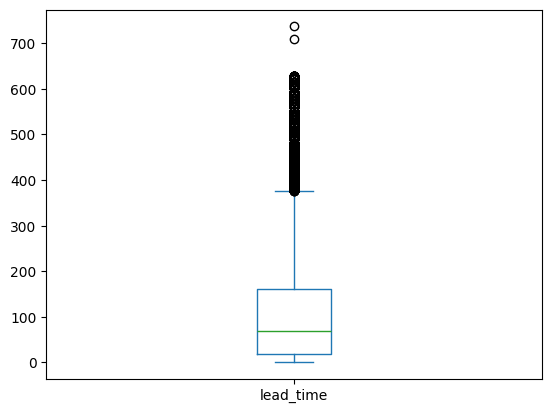

In [24]:
#Graph to detect outliers 
df['lead_time'].plot(kind = 'box') 

# Data Analysis and Visualizations

In [25]:
# To check percentage of Canceled
canceled_per = df["is_canceled"].value_counts(normalize =True)
print(canceled_per)

is_canceled
0    0.628653
1    0.371347
Name: proportion, dtype: float64


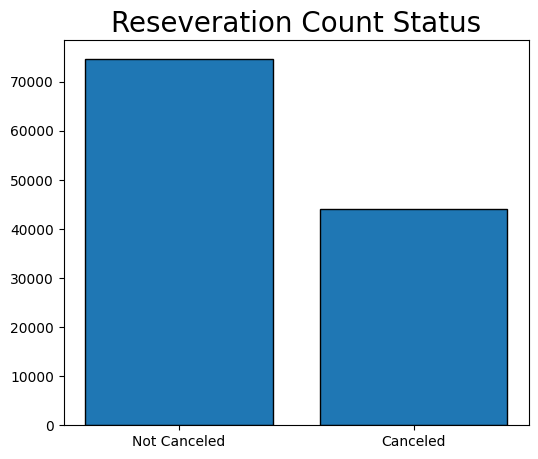

In [66]:
# Bar plot to see count of canceled and not canceled
plt.figure(figsize = (6,5))
plt.bar(['Not Canceled','Canceled'],df["is_canceled"].value_counts(), edgecolor = "k" )
plt.title("Reseveration Count Status",fontsize = 20)
plt.show()


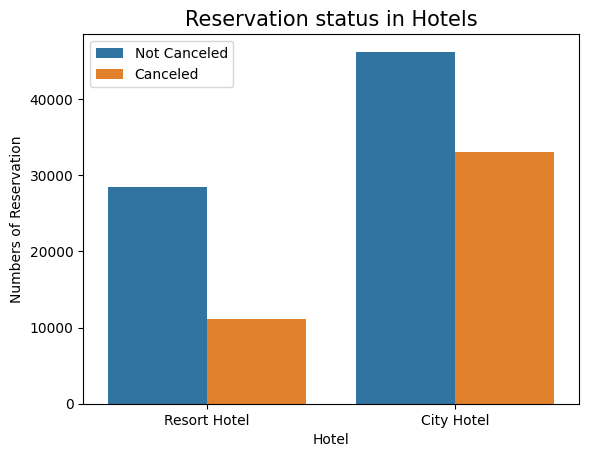

In [68]:
# Countplot to check reservation status in both Hotels
sns.countplot(data=df,x="hotel",hue='is_canceled')
plt.legend(labels=['Not Canceled', 'Canceled'])
plt.title("Reservation status in Hotels", fontsize=15)
plt.xlabel("Hotel")
plt.ylabel("Numbers of Reservation")
plt.savefig('reservation status in Hotels.png', dpi=300)
plt.show()

In [28]:
# To find average of Resort Hotel
resort_hotel =df[df["hotel"] == "Resort Hotel"]
resort_hotel['is_canceled'].value_counts(normalize = True)


is_canceled
0    0.72025
1    0.27975
Name: proportion, dtype: float64

In [29]:
#To find average of city hotel 
city_hotel =df[df["hotel"] == "City Hotel"]
city_hotel['is_canceled'].value_counts(normalize = True)

is_canceled
0    0.582918
1    0.417082
Name: proportion, dtype: float64

In [30]:
resort_hotel_summary = resort_hotel.groupby('reservation_status_date')['adr'].mean().reset_index()
city_hotel_summary = city_hotel.groupby('reservation_status_date')['adr'].mean().reset_index()
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           


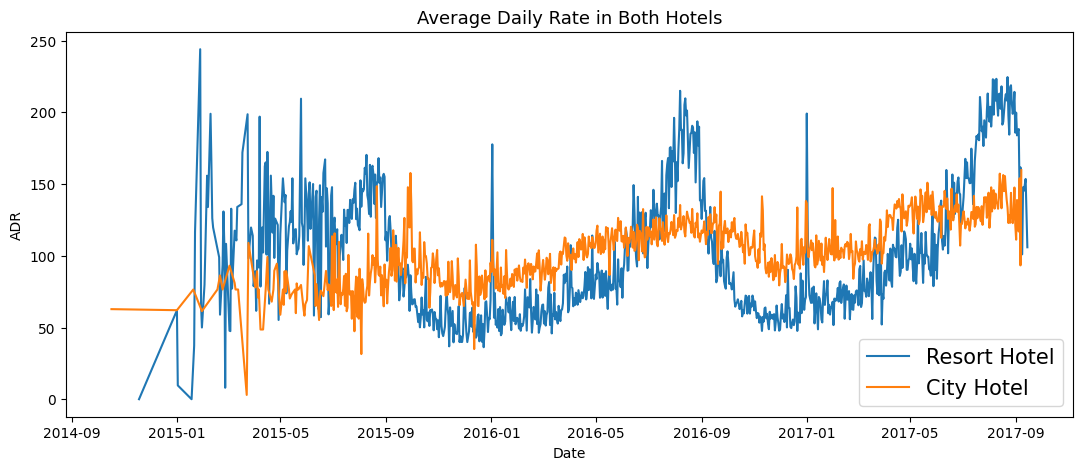

In [100]:
plt.figure(figsize=(13, 5))
plt.title("Average Daily Rate in Both Hotels" ,fontsize =13)
plt.plot(resort_hotel_summary["reservation_status_date"] , resort_hotel_summary['adr'], label= "Resort Hotel")
plt.plot(city_hotel_summary["reservation_status_date"] , city_hotel_summary['adr'], label= "City Hotel")
plt.legend(fontsize= 15)
plt.xlabel("Date")
plt.ylabel("ADR")
plt.show()


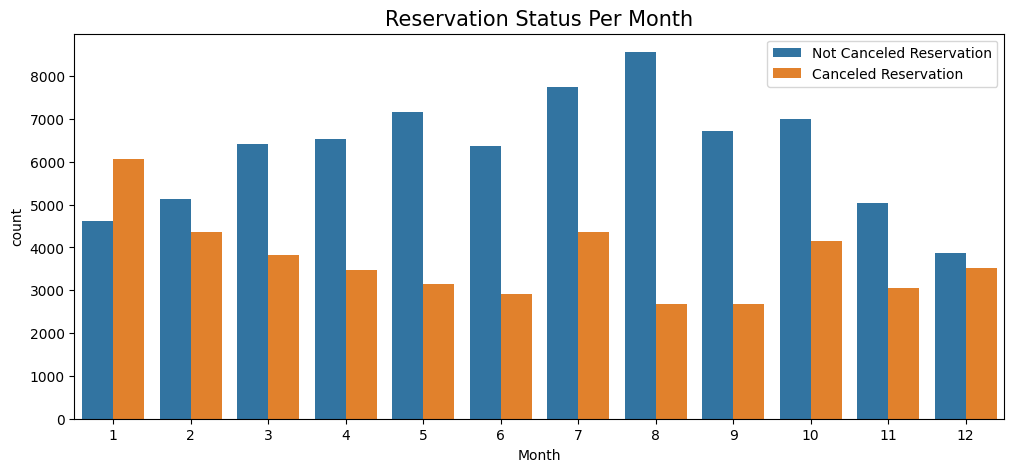

In [104]:
plt.figure(figsize=(12, 5))
df["month"]= df["reservation_status_date"].dt.month
sns.countplot(data= df , x= "month", hue= "is_canceled")
plt.xlabel("Month")
plt.title("Reservation Status Per Month", fontsize =15)
plt.legend(["Not Canceled Reservation","Canceled Reservation"])
plt.show()

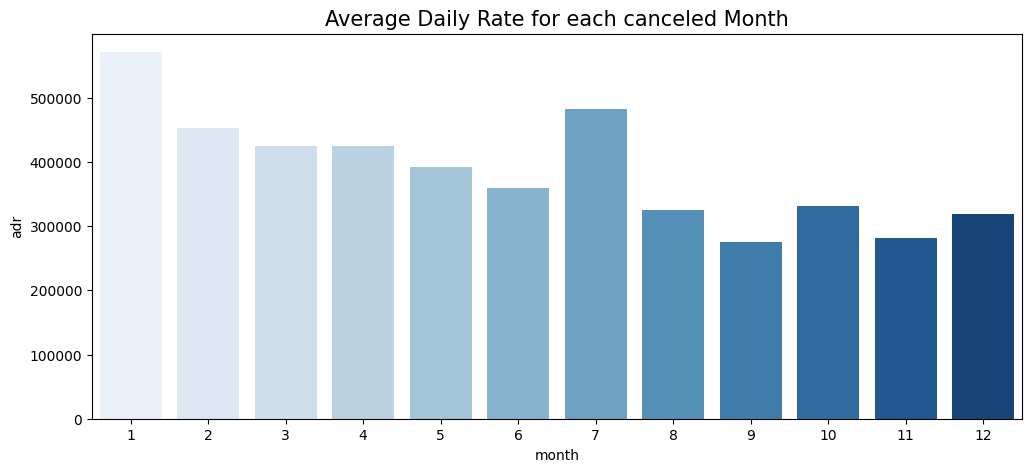

In [150]:
plt.figure(figsize=(12, 5))
high_rate= df[df["is_canceled"] == 1].groupby('month')["adr"].sum().reset_index()
plt.title("Average Daily Rate for each canceled Month",fontsize = 15)
sns.barplot(data= high_rate , x= "month" , y= "adr" , hue= None, palette ='Blues')
plt.show()

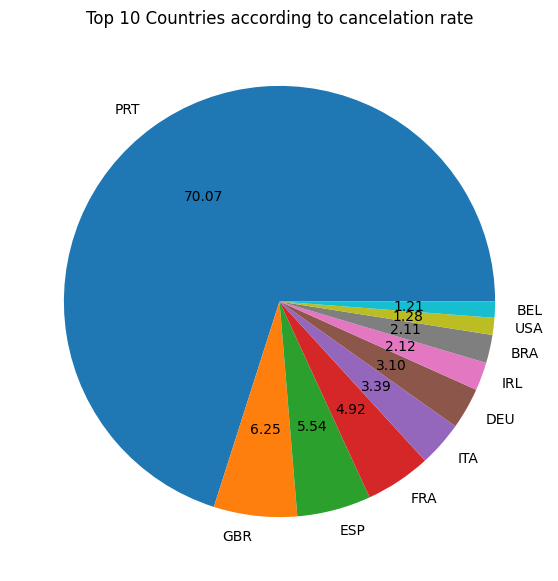

In [151]:
canceled_data = df[df["is_canceled"] == 1 ]
top_10_countries = canceled_data["country"].value_counts()[ :10]
plt.figure(figsize = (7,7))
plt.title("Top 10 Countries according to cancelation rate")
plt.pie( top_10_countries, autopct =  '%.2f', labels = top_10_countries.index)
plt.show()



In [38]:
 df["market_segment"].value_counts()

market_segment
Online TA        56402
Offline TA/TO    24159
Groups           19806
Direct           12448
Corporate         5111
Complementary      734
Aviation           237
Name: count, dtype: int64

In [39]:
df["market_segment"].value_counts(normalize = True)

market_segment
Online TA        0.474377
Offline TA/TO    0.203193
Groups           0.166581
Direct           0.104696
Corporate        0.042987
Complementary    0.006173
Aviation         0.001993
Name: proportion, dtype: float64

In [40]:
adr_summary = df.groupby('is_canceled')['adr'].mean().reset_index()

# Renaming for clarity
adr_summary['is_canceled'] = adr_summary['is_canceled'].map({0: 'Non canceled', 1: 'Canceled'})

print(adr_summary)

    is_canceled         adr
0  Non canceled  100.210618
1      Canceled  104.917985


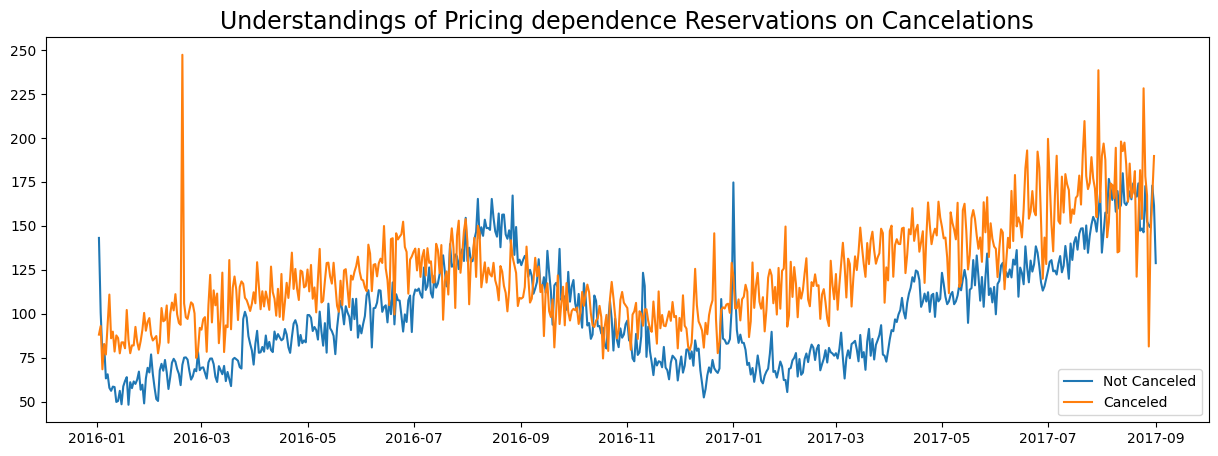

In [154]:
canceled_df = df[df['is_canceled'] == 1]
non_canceled_df = df[df['is_canceled'] == 0]


canceled_mean = canceled_df.groupby('reservation_status_date')['adr'].mean().reset_index()
canceled_mean.sort_values("reservation_status_date" ,inplace = True)
non_canceled_mean = non_canceled_df.groupby('reservation_status_date')['adr'].mean().reset_index()
non_canceled_mean.sort_values("reservation_status_date" ,inplace = True)

canceled_mean = canceled_mean[(canceled_mean['reservation_status_date'] > "2016") & (canceled_mean['reservation_status_date'] <= "2017-09")]
non_canceled_mean = non_canceled_mean[(non_canceled_mean['reservation_status_date'] > "2016") & (non_canceled_mean['reservation_status_date'] <= "2017-09")]
plt.figure(figsize = (15,5))

plt.plot(non_canceled_mean["reservation_status_date"] , non_canceled_mean["adr"], label = "Not Canceled")
plt.plot(canceled_mean["reservation_status_date"] , canceled_mean["adr"], label = "Canceled")
plt.title("Understandings of Pricing dependence Reservations on Cancelations",fontsize =17)
plt.legend()
plt.savefig("Understandings of Pricing dependence Reservations on Cancelations", dpi=300)

plt.show()
